In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import re

In [2]:
path = '/Users/desislavamarvakov/Study/HIT/שנה ב׳/סמסטר ב׳/Data Science/Final Project/pets data/austin/aac_intakes_outcomes.csv'
raw_df = pd.read_csv(path)
raw_df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,09/07/2007 0:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",07/12/2017 14:07,...,"(7.5, 10.0]",07/12/2017 0:00,12,2017,2017-12,Thursday,14,1,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,09/07/2007 0:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",20/12/2014 16:35,...,"(5.0, 7.5]",19/12/2014 10:21,12,2014,2014-12,Friday,10,2,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,09/07/2007 0:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",08/03/2014 17:10,...,"(5.0, 7.5]",07/03/2014 14:26,3,2014,2014-03,Friday,14,3,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,02/04/2004 0:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",07/04/2014 15:12,...,"(7.5, 10.0]",02/04/2014 15:55,4,2014,2014-04,Wednesday,15,1,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,16/10/1997 0:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",16/11/2013 11:54,...,"(15.0, 17.5]",16/11/2013 9:02,11,2013,2013-11,Saturday,9,1,0 days 02:52:00.000000000,0.119444


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79671 entries, 0 to 79670
Data columns (total 41 columns):
age_upon_outcome              79671 non-null object
animal_id_outcome             79671 non-null object
date_of_birth                 79671 non-null object
outcome_subtype               36348 non-null object
outcome_type                  79661 non-null object
sex_upon_outcome              79671 non-null object
age_upon_outcome_(days)       79671 non-null int64
age_upon_outcome_(years)      79671 non-null float64
age_upon_outcome_age_group    79671 non-null object
outcome_datetime              79671 non-null object
outcome_month                 79671 non-null int64
outcome_year                  79671 non-null int64
outcome_monthyear             79671 non-null object
outcome_weekday               79671 non-null object
outcome_hour                  79671 non-null int64
outcome_number                79671 non-null int64
dob_year                      79671 non-null int64
dob_month   

In [4]:
raw_df = raw_df[raw_df['animal_type'] != 'Livestock']
raw_df = raw_df[raw_df['animal_type'] != 'Bird']
raw_df = raw_df[raw_df['animal_type'] != 'Other']

In [5]:
print('There are {} duplicated rows'.format(raw_df.duplicated().sum()))
raw_df[raw_df.duplicated()].head()

There are 29 duplicated rows


,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
1126,8 years,A561806,30/11/2008 0:00,NaN,Return to Owner,Spayed Female,2920,8.000000,"(7.5, 10.0]",05/06/2017 18:09,...,"(7.5, 10.0]",05/06/2017 11:36,6,2017,2017-06,Monday,11,1,0 days 06:33:00.000000000,0.272917
6656,5 years,A667596,20/05/2012 0:00,NaN,Return to Owner,Spayed Female,1825,5.000000,"(2.5, 5.0]",27/03/2018 16:08,...,"(2.5, 5.0]",27/03/2018 12:23,3,2018,2018-03,Tuesday,12,1,0 days 03:45:00.000000000,0.156250
6996,11 months,A668183,29/07/2013 0:00,NaN,Return to Owner,Spayed Female,330,0.904110,"(-0.025, 2.5]",06/07/2014 15:58,...,"(-0.025, 2.5]",27/06/2014 11:34,6,2014,2014-06,Friday,11,4,9 days 04:24:00.000000000,9.183333
17472,1 year,A682781,02/01/2013 0:00,SCRP,Transfer,Neutered Male,365,1.000000,"(-0.025, 2.5]",13/08/2014 18:41,...,"(-0.025, 2.5]",03/07/2014 9:00,8,2014,2014-08,Wednesday,18,1,41 days 09:41:00.000000000,41.403472
18284,4 months,A683782,15/02/2014 0:00,SCRP,Transfer,Neutered Male,120,0.328767,"(-0.025, 2.5]",19/07/2014 15:55,...,"(-0.025, 2.5]",16/07/2014 9:00,7,2014,2014-07,Saturday,15,1,3 days 06:55:00.000000000,3.288194


In [6]:
no_duplic_df = raw_df.drop_duplicates(keep = 'first')

In [7]:
no_duplic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74875 entries, 0 to 79670
Data columns (total 41 columns):
age_upon_outcome              74875 non-null object
animal_id_outcome             74875 non-null object
date_of_birth                 74875 non-null object
outcome_subtype               32437 non-null object
outcome_type                  74870 non-null object
sex_upon_outcome              74875 non-null object
age_upon_outcome_(days)       74875 non-null int64
age_upon_outcome_(years)      74875 non-null float64
age_upon_outcome_age_group    74875 non-null object
outcome_datetime              74875 non-null object
outcome_month                 74875 non-null int64
outcome_year                  74875 non-null int64
outcome_monthyear             74875 non-null object
outcome_weekday               74875 non-null object
outcome_hour                  74875 non-null int64
outcome_number                74875 non-null int64
dob_year                      74875 non-null int64
dob_month   

In [8]:
clean_df = no_duplic_df.drop(columns=['count','found_location','outcome_subtype', 'intake_number', 'intake_hour', 'intake_weekday','intake_monthyear', 'intake_year', 'intake_month','outcome_hour', 'outcome_weekday','outcome_monthyear', 'outcome_year', 'outcome_month','outcome_number','dob_monthyear','dob_month','dob_year','time_in_shelter','intake_datetime','date_of_birth','outcome_datetime'])
clean_df.head()

,age_upon_outcome,animal_id_outcome,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,time_in_shelter_days
0,10 years,A006100,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,3650,10.0,"(7.5, 10.0]",0.588194
1,7 years,A006100,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2555,7.0,"(5.0, 7.5]",1.259722
2,6 years,A006100,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2190,6.0,"(5.0, 7.5]",1.113889
3,10 years,A047759,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",10 years,A047759,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,3650,10.0,"(7.5, 10.0]",4.970139
4,16 years,A134067,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",16 years,A134067,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,5840,16.0,"(15.0, 17.5]",0.119444


In [9]:
clean_df['age_upon_outcome_age_group'].value_counts(ascending=True)

(20.0, 22.5]         4
(17.5, 20.0]        52
(15.0, 17.5]       166
(12.5, 15.0]       865
(10.0, 12.5]      1056
(5.0, 7.5]        3408
(7.5, 10.0]       3607
(2.5, 5.0]       10686
(-0.025, 2.5]    55031
Name: age_upon_outcome_age_group, dtype: int64

In [10]:
clean_df['age_upon_intake_age_group'].value_counts(ascending=True)

(20.0, 22.5]         4
(17.5, 20.0]        51
(15.0, 17.5]       165
(12.5, 15.0]       839
(10.0, 12.5]      1039
(5.0, 7.5]        3408
(7.5, 10.0]       3527
(2.5, 5.0]       10631
(-0.025, 2.5]    55211
Name: age_upon_intake_age_group, dtype: int64

In [11]:
age_dif = clean_df[clean_df['age_upon_outcome_age_group']!= clean_df['age_upon_intake_age_group']]
num_age_dif = len(pd.unique(age_dif['animal_id_outcome']))
print(f'Amount of pets that aged in shlter: {num_age_dif}')


Amount of pets that aged in shlter: 559


In [12]:
clean_df['intake_type'].value_counts()

Stray                 55183
Owner Surrender       14679
Public Assist          4773
Euthanasia Request      240
Name: intake_type, dtype: int64

In [13]:
clean_df['animal_type'].value_counts()

Dog    45352
Cat    29523
Name: animal_type, dtype: int64

In [14]:
print(f"Number of Unique Dog Breeds: " + str(len(clean_df[clean_df['animal_type'] == 'Dog']['breed'].unique())))
print(f"Number of Uniqut Cat Breeds: " + str(len(clean_df[clean_df['animal_type'] == 'Cat']['breed'].unique())))

Number of Unique Dog Breeds: 1919
Number of Uniqut Cat Breeds: 82


In [15]:
clean_df[clean_df['animal_type'] == 'Dog']['breed'].value_counts()

Pit Bull Mix                           6253
Chihuahua Shorthair Mix                4831
Labrador Retriever Mix                 4789
German Shepherd Mix                    1950
Australian Cattle Dog Mix              1099
                                       ... 
Australian Shepherd/Brittany              1
Miniature Poodle/Chihuahua Longhair       1
Alaskan Malamute/Alaskan Husky            1
Dachshund Wirehair/Standard Poodle        1
Rat Terrier/Queensland Heeler             1
Name: breed, Length: 1919, dtype: int64

In [16]:
def breeds(x):
    if bool(re.search('/', x)):
        return 'Mixed Breed'
    elif bool(re.search('Mix', x)):
        return 'Mixed Breed'
    else:
        return x

In [17]:
#Dogs Breed Table
clean_df[clean_df['animal_type'] == 'Dog']['breed'].apply(breeds).value_counts().head(10)

Mixed Breed            42182
Labrador Retriever       239
German Shepherd          236
Pit Bull                 233
Chihuahua Shorthair      204
Siberian Husky           115
Shih Tzu                 114
Rottweiler               105
Dachshund                101
Boxer                     92
Name: breed, dtype: int64

In [18]:
#Cats breed table
clean_df[clean_df['animal_type'] == 'Cat']['breed'].apply(breeds).value_counts().head(10)

Mixed Breed             28841
Domestic Shorthair        387
Domestic Medium Hair      132
Siamese                    63
Domestic Longhair          44
Maine Coon                 10
Persian                     9
Snowshoe                    8
Himalayan                   6
Russian Blue                5
Name: breed, dtype: int64

In [19]:
clean_df.dropna(how = 'any', inplace = True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74870 entries, 0 to 79670
Data columns (total 19 columns):
age_upon_outcome              74870 non-null object
animal_id_outcome             74870 non-null object
outcome_type                  74870 non-null object
sex_upon_outcome              74870 non-null object
age_upon_outcome_(days)       74870 non-null int64
age_upon_outcome_(years)      74870 non-null float64
age_upon_outcome_age_group    74870 non-null object
age_upon_intake               74870 non-null object
animal_id_intake              74870 non-null object
animal_type                   74870 non-null object
breed                         74870 non-null object
color                         74870 non-null object
intake_condition              74870 non-null object
intake_type                   74870 non-null object
sex_upon_intake               74870 non-null object
age_upon_intake_(days)        74870 non-null int64
age_upon_intake_(years)       74870 non-null float64
age_upo

In [20]:
clean_df.head()

,age_upon_outcome,animal_id_outcome,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,time_in_shelter_days
0,10 years,A006100,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,3650,10.0,"(7.5, 10.0]",0.588194
1,7 years,A006100,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2555,7.0,"(5.0, 7.5]",1.259722
2,6 years,A006100,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2190,6.0,"(5.0, 7.5]",1.113889
3,10 years,A047759,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",10 years,A047759,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,3650,10.0,"(7.5, 10.0]",4.970139
4,16 years,A134067,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",16 years,A134067,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,5840,16.0,"(15.0, 17.5]",0.119444


In [21]:
#n - number of different pets (Dogs & Cats)
#there are pets that are registered few times (back in shlter)
n = len(pd.unique(clean_df['animal_id_outcome']))
n

67211

In [26]:
intake_type_count = clean_df['intake_type'].value_counts()
intake_type_count

Stray                 55180
Owner Surrender       14679
Public Assist          4771
Euthanasia Request      240
Name: intake_type, dtype: int64

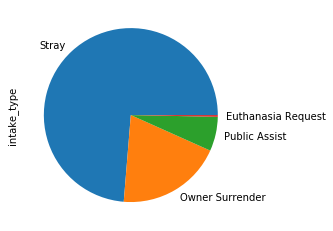

In [27]:
intake_type_count.plot(kind='pie')

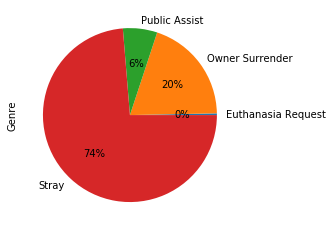

In [44]:
clean_df['intake_type'].str.get_dummies().sum().plot.pie(label='Genre', autopct='%1.0f%%')

In [28]:
outcome_type_count = clean_df['outcome_type'].value_counts()
outcome_type_count

Adoption           33245
Transfer           23124
Return to Owner    14736
Euthanasia          2974
Died                 544
Rto-Adopt            179
Missing               45
Disposal              23
Name: outcome_type, dtype: int64

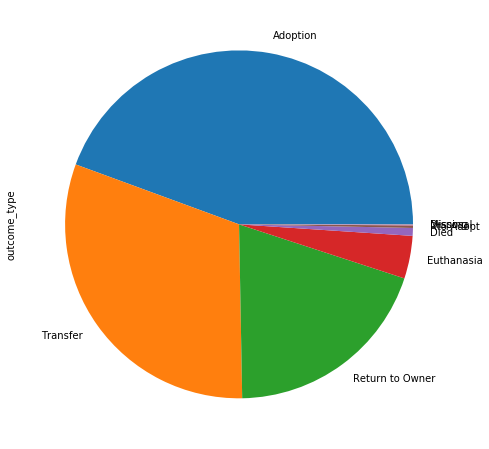

In [43]:
outcome_type_count.plot(kind='pie',figsize=(8, 8))

In [ ]:
clean_df

In [ ]:
clean_df.to_csv('clean_outcome_intake.csv')